# Preprocessing
based on KuanYao's works

In [1]:
# impirt important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
# read data
airline_data = pd.read_csv('../../data/dataset/airline.csv')
cache_map_data = pd.read_csv('../../data/dataset/cache_map.csv')
group_data = pd.read_csv('../../data/dataset/group.csv')
order_data = pd.read_csv('../../data/dataset/order.csv')
day_schedule_data = pd.read_csv('../../data/dataset/day_schedule.csv')

# lion_cache 保留
print('\n \n  !!!!!!!!!!!!!!!!!!!!!!!!!!!!  警告  !!!!!!!!!!!!!!!!!!!!!!!!　\n  \n  lion_cache data is ignored temporarily. \n \n ')

# test and train data
train_data = pd.read_csv('../../data/training-set.csv')
test_data = pd.read_csv('../../data/testing-set.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



 
  !!!!!!!!!!!!!!!!!!!!!!!!!!!!  警告  !!!!!!!!!!!!!!!!!!!!!!!!　
  
  lion_cache data is ignored temporarily. 
 
 


## have a look of each dataset

### airline_data

In [3]:
airline_data.head(5)

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
0,63695,去程,2017/3/22 23:30,TPE 桃園機場,2017/3/22 14:15,HNL 檀香山機場
1,63695,回程,2017/4/1 14:30,LAX 洛杉機機場,2017/4/2 21:00,TPE 桃園機場
2,53481,去程,2017/5/17 23:00,TPE 桃園機場,2017/5/17 14:45,HNL 檀香山機場
3,53481,回程,2017/5/27 16:00,LAX 洛杉機機場,2017/5/28 21:05,TPE 桃園機場
4,54305,去程,2017/6/21 23:30,TPE 桃園機場,2017/6/21 14:15,HNL 檀香山機場


In [4]:
airline_data.describe()

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
count,104275,104275,104275,104275,104275,104275
unique,48796,2,60216,204,60377,207
top,85c9b81cde3f2ca53424198d37189024,去程,2018/3/10 09:30,TPE 桃園機場,2018/2/17 11:15,TPE 桃園機場
freq,8,52223,10,40984,10,41125


In [12]:
# airline_data.src_airport.value_counts()

In [5]:
airline_data['group_id'].value_counts(ascending=False)

85c9b81cde3f2ca53424198d37189024    8
9bcb042a7052030d5c8b27bf50cacaea    8
64613                               7
20056                               7
cdd9af94ea82c23d7ca0500542dd26d4    6
8911                                6
646de67c838e9ea4c45516a176ebf249    6
f365743bed5b0deb040e1fd552e35b9f    6
59118                               6
1046                                6
59083c50fa377da7d29a58065fe72e27    6
7a2af61e0ef0f7c9b65b8c8ae216264d    6
49436                               6
55392                               6
4a8015320fd01091712b930f5fe12e0a    6
50502                               6
28016                               6
1d050e87b38993613982b9f70ca8a404    6
65440                               6
136e7049716c42eca5414c87d1d36329    6
3277                                6
4181                                6
33222                               6
61185                               6
b53c7868b7c40591ffd2bf1e03c23f26    6
205                                 6
66280       

In [6]:
airline_data[airline_data['group_id'] == '85c9b81cde3f2ca53424198d37189024']

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
103675,85c9b81cde3f2ca53424198d37189024,去程,2018/4/1 11:50,TPE 桃園機場,2018/4/1 13:55,HKG 香港機場
103676,85c9b81cde3f2ca53424198d37189024,去程,2018/4/1 13:20,KHH 高雄機場,2018/4/1 14:55,HKG 香港機場
103677,85c9b81cde3f2ca53424198d37189024,去程,2018/4/1 19:05,HKG 香港機場,2018/4/1 23:40,AUH 阿布達比機場
103678,85c9b81cde3f2ca53424198d37189024,去程,2018/4/2 03:20,AUH 阿布達比機場,2018/4/2 05:05,CAI 開羅機場
103679,85c9b81cde3f2ca53424198d37189024,回程,2018/4/9 13:30,CAI 開羅機場,2018/4/9 18:55,AUH 阿布達比機場
103680,85c9b81cde3f2ca53424198d37189024,回程,2018/4/9 21:50,AUH 阿布達比機場,2018/4/10 10:05,HKG 香港機場
103681,85c9b81cde3f2ca53424198d37189024,回程,2018/4/10 13:10,HKG 香港機場,2018/4/10 15:10,TPE 桃園機場
103682,85c9b81cde3f2ca53424198d37189024,回程,2018/4/10 12:40,HKG 香港機場,2018/4/10 14:10,KHH 高雄機場


> Brief Summary：group_id is not distinct. It includes "transfering" and "different start/end points". <<<<<

In [7]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104275 entries, 0 to 104274
Data columns (total 6 columns):
group_id       104275 non-null object
go_back        104275 non-null object
fly_time       104275 non-null object
src_airport    104275 non-null object
arrive_time    104275 non-null object
dst_airport    104275 non-null object
dtypes: object(6)
memory usage: 4.8+ MB


### cache_map

In [8]:
cache_map_data.head(5)

,file_name,url
0,lion_cache_1.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
1,lion_cache_2.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
2,lion_cache_3.jpg,https://www.liontravel.com/Comm/2trs/hotsale/p...
3,lion_cache_4.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
4,lion_cache_5.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...


In [9]:
cache_map_data.describe()

,file_name,url
count,321,321
unique,321,321
top,lion_cache_150.jpg,https://www.liontravel.com/Comm/2trs/hotsale/p...
freq,1,1


In [87]:
cache_map_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 2 columns):
file_name    321 non-null object
url          321 non-null object
dtypes: object(2)
memory usage: 5.1+ KB


> Campaign pictures

### group_data

In [88]:
group_data.head(5)

,group_id,sub_line,area,days,begin_date,price,product_name,promotion_prog
0,63695,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0,最高省8000》大美西～夏威夷、優勝美地、西峽天空步道、聖地牙哥、環球影城(哈利波特)12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
1,53481,subline_value_1,area_value_1,12.0,17-May-17,112900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
2,54305,subline_value_1,area_value_1,12.0,21-Jun-17,115900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
3,41766,subline_value_1,area_value_1,12.0,12-Jul-17,126900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
4,32196,subline_value_1,area_value_1,12.0,9-Aug-17,126900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...


In [21]:
group_data.describe()

,days,price
count,49223.000000,49223.000000
mean,6.245962,34705.866871
std,2.024880,20509.189141
min,2.000000,3000.000000
25%,5.000000,20900.000000
50%,5.000000,29900.000000
75%,8.000000,39900.000000
max,17.000000,222900.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1286985c0>,
      dtype=object)

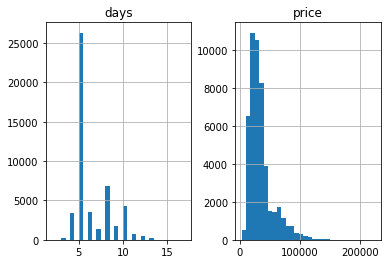

In [25]:
group_data.hist(bins=30)

> most frequent travel days are 5, and the price centor around 3w NTD 

In [89]:
group_data[group_data['group_id'] == '85c9b81cde3f2ca53424198d37189024']

,group_id,sub_line,area,days,begin_date,price,product_name,promotion_prog
49062,85c9b81cde3f2ca53424198d37189024,subline_value_20,area_value_133,10.0,1-Apr-18,59900.0,"《早鳥最高折$10,000》【雙雄經典埃及】法老傳奇~五星尼羅河遊輪、神秘金字塔、人面獅身像...","&lt;hr size=""5"" align=""center"" noshade width=""..."


In [26]:
group_data['group_id'].value_counts(ascending=False).head()

976b2738ba3334bc5089ee26698d5307    1
108c70e5ceb89b399a6b187ef415bfc0    1
67893                               1
21511                               1
8b50d9563765fa65ba9e105c529916a4    1
Name: group_id, dtype: int64

> group_id is Distinct

In [92]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49223 entries, 0 to 49222
Data columns (total 8 columns):
group_id          49223 non-null object
sub_line          49223 non-null object
area              49223 non-null object
days              49223 non-null float64
begin_date        49223 non-null object
price             49223 non-null float64
product_name      49218 non-null object
promotion_prog    49167 non-null object
dtypes: float64(2), object(6)
memory usage: 3.0+ MB


### order_data

In [93]:
order_data.head(5)

,order_id,group_id,order_date,source_1,source_2,unit,people_amount
0,136100,63695,5-Jan-17,src1_value_1,src2_value_1,unit_value_1,2
1,140370,63695,9-Nov-16,src1_value_1,src2_value_1,unit_value_2,1
2,211009,63695,20-Jan-17,src1_value_1,src2_value_1,unit_value_3,2
3,41571,53481,14-Mar-17,src1_value_1,src2_value_1,unit_value_4,4
4,64125,53481,27-Mar-17,src1_value_2,src2_value_1,unit_value_5,1


In [27]:
order_data['order_id'].value_counts(ascending=False).head()

77c6fd3f68826ac6e4a3b4f75d772e53    1
140552                              1
140579                              1
140580                              1
140581                              1
Name: order_id, dtype: int64

In [30]:
order_data['group_id'].value_counts(ascending=False).head()

1ac092064f6c132cb8786e49ace26919    131
24090                               120
f68ed6afdc9d542e99ef3927170d51a2     97
940bce72ed54dddf3d2206c81adb7714     95
8757b740e6dd2cd4e730540e8a0ad889     90
Name: group_id, dtype: int64

In [31]:
order_data['group_id'].value_counts(ascending=False).describe()

count    45043.000000
mean         8.811913
std         10.146496
min          1.000000
25%          1.000000
50%          4.000000
75%         14.000000
max        131.000000
Name: group_id, dtype: float64

> 同團有與成行機會有關變數思考：
- 多少個訂單
- 總人數
- 訂單時間區間
- 總unit
- 來源分散性

In [96]:
order_data[order_data['group_id'] == '1ac092064f6c132cb8786e49ace26919']

,order_id,group_id,order_date,source_1,source_2,unit,people_amount
354540,5a3c1ed39d05298b6e407aee1107779f,1ac092064f6c132cb8786e49ace26919,19-Mar-18,src1_value_1,src2_value_1,unit_value_1,2
354541,c5b94ca35d2e2957fabd5c8d9b018aae,1ac092064f6c132cb8786e49ace26919,20-Mar-18,src1_value_1,src2_value_1,unit_value_72,2
354542,4785cf83a7f834abf42b23d02b92a374,1ac092064f6c132cb8786e49ace26919,23-Feb-18,src1_value_2,src2_value_3,unit_value_6,2
354543,62b9ce454f5a371541ae5b08557ca2e9,1ac092064f6c132cb8786e49ace26919,7-Mar-18,src1_value_1,src2_value_1,unit_value_1,2
354544,d495ad05cc8528e085d4cfc0bc383cd6,1ac092064f6c132cb8786e49ace26919,7-Mar-18,src1_value_1,src2_value_4,unit_value_1,2
354545,b213cce5abcab627ffada14e2543d3b4,1ac092064f6c132cb8786e49ace26919,16-Mar-18,src1_value_2,src2_value_3,unit_value_6,2
354546,ed0f24379f18d3ec6040c5880c2f960a,1ac092064f6c132cb8786e49ace26919,7-Mar-18,src1_value_1,src2_value_1,unit_value_1,3
354547,4b200437a8bb45c7061d27894c608429,1ac092064f6c132cb8786e49ace26919,12-Mar-18,src1_value_1,src2_value_1,unit_value_1,3
354548,a32847b6beb1470212f16db385a944b0,1ac092064f6c132cb8786e49ace26919,6-Mar-18,src1_value_1,src2_value_1,unit_value_1,1
354549,45b7e7bb0782c97f7514c0d73b5a4c5b,1ac092064f6c132cb8786e49ace26919,23-Feb-18,src1_value_1,src2_value_1,unit_value_65,3


In [97]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396915 entries, 0 to 396914
Data columns (total 7 columns):
order_id         396915 non-null object
group_id         396915 non-null object
order_date       396915 non-null object
source_1         396915 non-null object
source_2         396915 non-null object
unit             396915 non-null object
people_amount    396915 non-null int64
dtypes: int64(1), object(6)
memory usage: 21.2+ MB


> order_id is unique (based on 注文者、数人OK)

> group_id is not unique

### day_schedule_data

In [98]:
day_schedule_data.head(15)

,group_id,day,title
0,63695,1.0,台北 [AIR]歐胡島市區觀光【州政府．皇宮．國王銅像．中國城】
1,63695,2.0,夏威夷小環島【鑽石頭山．恐龍灣．噴泉口】－珍珠港[BOATS]豪華愛之船Star of Ho...
2,63695,3.0,夏威夷 [AIR] 舊金山
3,63695,4.0,舊金山市區觀光【藝術宮．金門大橋．金門公園．漁人碼頭．金門灣遊船．市政廳．雙子峰．九曲花街】
4,63695,5.0,舊金山－300KM－優勝美地國家公園－100KM－佛雷斯諾
5,63695,6.0,佛雷斯諾－380KM－巴斯托《名牌大賣場》－260KM－拉斯維加斯
6,63695,7.0,拉斯維加斯－200KM－大峽谷【西峽「天空步道」一日遊】－200KM－拉斯維加斯
7,63695,8.0,拉斯維加斯─450KM─洛杉磯市區觀光【中國戲院．星光大道．好萊塢杜比戲院 Dolby Th...
8,63695,9.0,洛杉磯190KM－聖地牙哥【海景火車－[BOATS]聖地牙哥港灣遊船－舊城區】
9,63695,10.0,洛杉磯【環球影城製片廠(哈利波特主題樂園)】


### train_data

In [99]:
train_data.head(5)

,order_id,deal_or_not
0,136100,0
1,140370,0
2,211009,0
3,41571,1
4,64125,1


In [32]:
train_data['order_id'].value_counts(ascending=False).head()

2047      1
88702     1
283359    1
338672    1
330484    1
Name: order_id, dtype: int64

In [101]:
train_data.describe()

,order_id,deal_or_not
count,297020.000000,297020.000000
mean,156583.192866,0.197253
std,95659.738870,0.397925
min,1.000000,0.000000
25%,75101.750000,0.000000
50%,150249.500000,0.000000
75%,234075.250000,0.000000
max,340111.000000,1.000000


>只有大約兩成會成行，難怪會需要辦比賽

In [102]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297020 entries, 0 to 297019
Data columns (total 2 columns):
order_id       297020 non-null int64
deal_or_not    297020 non-null int64
dtypes: int64(2)
memory usage: 4.5 MB


In [33]:
train_data['order_id'] = train_data['order_id'].astype(object)

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297020 entries, 0 to 297019
Data columns (total 2 columns):
order_id       297020 non-null object
deal_or_not    297020 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.5+ MB


### test_data

In [35]:
test_data.head(5)

,order_id,deal_or_not
0,3240332c374b21f9882f899f13b71308,NaN
1,bf0c0a570b848499180b9dbd49a12d76,NaN
2,0db30b8d4770f5145d932133e54a35a1,NaN
3,d3eaffe7c163fabadd8bff4aa28ee1c1,NaN
4,fefb2b6d55df4474e4826ddac2a97465,NaN


In [106]:
test_data['order_id'].describe()

count                                99895
unique                               99895
top       ecf4ecaa01a7543a2147ee13b8c720d5
freq                                     1
Name: order_id, dtype: object

In [107]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99895 entries, 0 to 99894
Data columns (total 2 columns):
order_id        99895 non-null object
 deal_or_not    0 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


### Have a look of order_id (make sure we can have each order detail even there are two patterns of order_id

(array([9.00000e+00, 0.00000e+00, 9.00000e+01, 0.00000e+00, 8.90000e+02,
        0.00000e+00, 8.90000e+03, 0.00000e+00, 8.89760e+04, 1.98155e+05]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

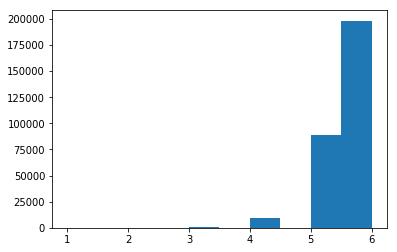

In [108]:
plt.hist(train_data.order_id.map(lambda x: len(str(x))))

(array([    0.,     0.,     0.,     0.,     0., 99895.,     0.,     0.,
            0.,     0.]),
 array([31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2, 32.3, 32.4, 32.5]),
 <a list of 10 Patch objects>)

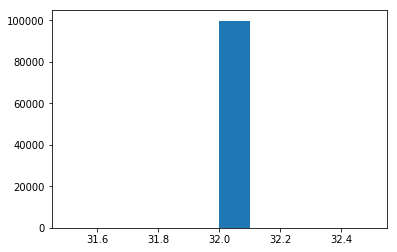

In [109]:
plt.hist(test_data.order_id.map(lambda x: len(str(x))))

(array([  9889., 287131.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  99895.]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <a list of 10 Patch objects>)

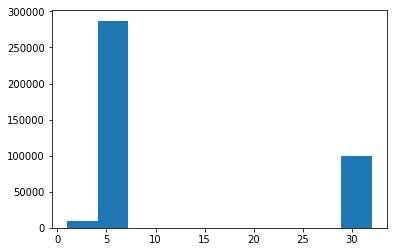

In [110]:
plt.hist(order_data.order_id.map(lambda x: len(str(x))))

> train data : order id → shorter ones

> test_data: order id → longer ones

> order_data: order id → all

## Merge Dataset

In [111]:
'''
Output image:


train_data.order_id   --- not for training

order_data.group_id     --- not for training
order_data.order_date      --- not for training
order_data.source_1 [v]
order_data.source_2 [v]
order_data.unit [v]
order_data.people_amount [v]

## TODO ##
order_date_day  [v] (曜日)
order_date_week [v]
order_date_month [v]
date_diff_order_begin [vv]

group_data.sub_line [v]
group_data.area [v]
group_data.days [v]
group_data.begin_date [v]    --- not for training
group_data.price [v]

## TODO ##
旅行團總人數 [v]

## TODO ##
begin_date_day  [v] (曜日)
begin_date_week  [v]    -- 相談待
begin_date_month [v]
end_date_day    [v]    (曜日)
end_date_week   [v]      -- 相談待
end_date_month  [v] 

## TODO ##
from airplane data:
for each group_id (pivot):  去程轉機次數, 回程轉機次數, 去程所需時間, 回程所需時間   (pay attention to time zone ?)


train_data.deal_or_not
'''

'\nOutput image:\n\n\ntrain_data.order_id   --- not for training\n\norder_data.group_id     --- not for training\norder_data.order_date      --- not for training\norder_data.source_1\norder_data.source_2\norder_data.unit\norder_data.people_amount\n\n## TODO ##\norder_date_week\norder_date_month\ndate_diff_order_begin\n\ngroup_data.sub_line\ngroup_data.area\ngroup_data.days\ngroup_data.begin_date     --- not for training\ngroup_data.price\n\n\n## TODO ##\nbegin_date_day  (曜日)\nbegin_date_week      -- 相談待\nbegin_date_month\nend_date_day   (曜日)\nend_date_week         -- 相談待\nend_date_month\n\n## TODO ##\nfrom airplane data:\nfor each group_id (pivot):  去程轉機次數, 回程轉機次數, 去程所需時間, 回程所需時間   (pay attention to time zone ?)\n\n\ntrain_data.deal_or_not\n'

In [164]:
order_data['order_date_dt'] = pd.to_datetime(order_data.order_date, format='%d-%b-%y') # ref: http://strftime.org/
order_data['year'] = order_data.order_date_dt.dt.year
order_data['month'] = order_data.order_date_dt.dt.month
order_data['day'] = order_data.order_date_dt.dt.day
order_data['dayofyear'] = order_data.order_date_dt.dt.dayofyear
order_data['weekday'] = order_data.order_date_dt.dt.dayofweek # 0=Mon, 6=Sun
order_data['unit']=order_data.unit.str.replace('unit_value_', '').astype(int)
order_data['source_1']=order_data.source_1.str.replace('src1_value_', '')
order_data['source_2']=order_data.source_2.str.replace('src2_value_', '')

In [147]:
order_data.head()

,order_id,group_id,order_date,source_1,source_2,unit,people_amount,order_date_dt,year,month,day,dayofyear,weekday
0,136100,63695,5-Jan-17,1,1,1,2,2017-01-05,2017,1,5,5,3
1,140370,63695,9-Nov-16,1,1,2,1,2016-11-09,2016,11,9,314,2
2,211009,63695,20-Jan-17,1,1,3,2,2017-01-20,2017,1,20,20,4
3,41571,53481,14-Mar-17,1,1,4,4,2017-03-14,2017,3,14,73,1
4,64125,53481,27-Mar-17,2,1,5,1,2017-03-27,2017,3,27,86,0


In [80]:
group_data.head()

,group_id,sub_line,area,days,begin_date,price,product_name,promotion_prog
0,63695,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0,最高省8000》大美西～夏威夷、優勝美地、西峽天空步道、聖地牙哥、環球影城(哈利波特)12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
1,53481,subline_value_1,area_value_1,12.0,17-May-17,112900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
2,54305,subline_value_1,area_value_1,12.0,21-Jun-17,115900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
3,41766,subline_value_1,area_value_1,12.0,12-Jul-17,126900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
4,32196,subline_value_1,area_value_1,12.0,9-Aug-17,126900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...


In [81]:
group_data.sub_line.value_counts()

subline_value_11    13089
subline_value_5      9659
subline_value_12     6630
subline_value_7      2696
subline_value_19     2380
subline_value_18     2309
subline_value_15     2063
subline_value_13     1860
subline_value_16     1353
subline_value_9      1182
subline_value_22     1022
subline_value_10      950
subline_value_17      694
subline_value_1       686
subline_value_2       486
subline_value_21      474
subline_value_4       454
subline_value_6       427
subline_value_20      376
subline_value_14      275
subline_value_8       131
subline_value_23       17
subline_value_3        10
Name: sub_line, dtype: int64

In [82]:
group_data.area.value_counts()

area_value_93     5300
area_value_100    3628
area_value_99     3251
area_value_92     3021
area_value_118    2113
area_value_96     1860
area_value_91     1718
area_value_115    1621
area_value_19     1374
area_value_94     1224
area_value_113     904
area_value_120     869
area_value_40      843
area_value_97      795
area_value_25      706
area_value_35      698
area_value_17      689
area_value_132     689
area_value_111     684
area_value_20      626
area_value_32      621
area_value_24      579
area_value_70      564
area_value_2       557
area_value_48      536
area_value_31      508
area_value_21      504
area_value_63      473
area_value_107     454
area_value_18      431
                  ... 
area_value_41        8
area_value_77        7
area_value_151       6
area_value_87        5
area_value_16        5
area_value_37        5
area_value_57        5
area_value_146       4
area_value_13        4
area_value_153       4
area_value_43        4
area_value_141       4
area_value_

In [159]:
group_data['sub_line'] = group_data.sub_line.str.replace('subline_value_','')
group_data['area'] = group_data.area.str.replace('area_value_','')
group_data['begin_date_dt'] = pd.to_datetime(group_data.begin_date, format='%d-%b-%y')
group_data['begin_year'] = group_data.begin_date_dt.dt.year
group_data['begin_month'] = group_data.begin_date_dt.dt.month
group_data['begin_day'] = group_data.begin_date_dt.dt.day
group_data['begin_dayofyear'] = group_data.begin_date_dt.dt.dayofyear
group_data['begin_weekday'] = group_data.begin_date_dt.dt.dayofweek # 0=Mon, 6=Sun
group_data['end_date_dt'] = group_data.begin_date_dt + group_data['days'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
group_data['end_year'] = group_data.end_date_dt.dt.year
group_data['end_month'] = group_data.end_date_dt.dt.month
group_data['end_day'] = group_data.end_date_dt.dt.day
group_data['end_dayofyear'] = group_data.end_date_dt.dt.dayofyear
group_data['end_weekday'] = group_data.end_date_dt.dt.dayofweek # 0=Mon, 6=Sun

In [160]:
group_data.head()

,group_id,sub_line,area,days,begin_date,price,product_name,promotion_prog,begin_date_dt,begin_year,begin_month,begin_day,begin_dayofyear,begin_weekday,end_date_dt,end_year,end_month,end_day,end_dayofyear,end_weekday
0,63695,1,1,12.0,22-Mar-17,106900.0,最高省8000》大美西～夏威夷、優勝美地、西峽天空步道、聖地牙哥、環球影城(哈利波特)12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...,2017-03-22,2017,3,22,81,2,2017-04-03,2017,4,3,93,0
1,53481,1,1,12.0,17-May-17,112900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...,2017-05-17,2017,5,17,137,2,2017-05-29,2017,5,29,149,0
2,54305,1,1,12.0,21-Jun-17,115900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...,2017-06-21,2017,6,21,172,2,2017-07-03,2017,7,3,184,0
3,41766,1,1,12.0,12-Jul-17,126900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...,2017-07-12,2017,7,12,193,2,2017-07-24,2017,7,24,205,0
4,32196,1,1,12.0,9-Aug-17,126900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...,2017-08-09,2017,8,9,221,2,2017-08-21,2017,8,21,233,0


### 旅行團總人數

In [85]:
order_data.head()

,order_id,group_id,order_date,source_1,source_2,unit,people_amount,order_date_dt,year,month,day,dayofyear,weekday
0,136100,63695,5-Jan-17,src1_value_1,src2_value_1,unit_value_1,2,2017-01-05,2017,1,5,5,3
1,140370,63695,9-Nov-16,src1_value_1,src2_value_1,unit_value_2,1,2016-11-09,2016,11,9,314,2
2,211009,63695,20-Jan-17,src1_value_1,src2_value_1,unit_value_3,2,2017-01-20,2017,1,20,20,4
3,41571,53481,14-Mar-17,src1_value_1,src2_value_1,unit_value_4,4,2017-03-14,2017,3,14,73,1
4,64125,53481,27-Mar-17,src1_value_2,src2_value_1,unit_value_5,1,2017-03-27,2017,3,27,86,0


count    45043.000000
mean        28.259841
std         30.519101
min          1.000000
25%          5.000000
50%         17.000000
75%         43.000000
max        487.000000
Name: people_amount, dtype: float64


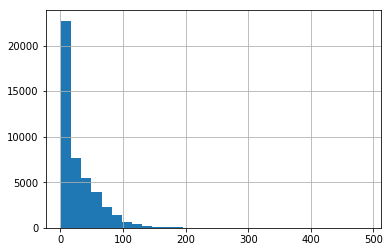

In [105]:
group_size = order_data.groupby('group_id')['people_amount'].sum()
print(group_size.describe())
group_size.hist(bins=30)

In [106]:
order_data['group_size'] = order_data.groupby('group_id')['people_amount'].transform(sum)

In [165]:
order_data.head()

,order_id,group_id,order_date,source_1,source_2,unit,people_amount,order_date_dt,year,month,day,dayofyear,weekday
0,136100,63695,5-Jan-17,1,1,1,2,2017-01-05,2017,1,5,5,3
1,140370,63695,9-Nov-16,1,1,2,1,2016-11-09,2016,11,9,314,2
2,211009,63695,20-Jan-17,1,1,3,2,2017-01-20,2017,1,20,20,4
3,41571,53481,14-Mar-17,1,1,4,4,2017-03-14,2017,3,14,73,1
4,64125,53481,27-Mar-17,2,1,5,1,2017-03-27,2017,3,27,86,0


## TODO ##
from airplane data:
for each group_id (pivot):  去程轉機次數, 回程轉機次數, 去程所需時間, 回程所需時間   (pay attention to time zone ?)
- 要處理時區問題orz

### 轉機相關

In [248]:
airline_data = pd.read_csv('../../data/dataset/airline.csv')
airline_data.head()

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
0,63695,去程,2017/3/22 23:30,TPE 桃園機場,2017/3/22 14:15,HNL 檀香山機場
1,63695,回程,2017/4/1 14:30,LAX 洛杉機機場,2017/4/2 21:00,TPE 桃園機場
2,53481,去程,2017/5/17 23:00,TPE 桃園機場,2017/5/17 14:45,HNL 檀香山機場
3,53481,回程,2017/5/27 16:00,LAX 洛杉機機場,2017/5/28 21:05,TPE 桃園機場
4,54305,去程,2017/6/21 23:30,TPE 桃園機場,2017/6/21 14:15,HNL 檀香山機場


In [238]:
airline_data[airline_data['group_id'] == '85c9b81cde3f2ca53424198d37189024']

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
103675,85c9b81cde3f2ca53424198d37189024,去程,2018/4/1 11:50,TPE 桃園機場,2018/4/1 13:55,HKG 香港機場
103676,85c9b81cde3f2ca53424198d37189024,去程,2018/4/1 13:20,KHH 高雄機場,2018/4/1 14:55,HKG 香港機場
103677,85c9b81cde3f2ca53424198d37189024,去程,2018/4/1 19:05,HKG 香港機場,2018/4/1 23:40,AUH 阿布達比機場
103678,85c9b81cde3f2ca53424198d37189024,去程,2018/4/2 03:20,AUH 阿布達比機場,2018/4/2 05:05,CAI 開羅機場
103679,85c9b81cde3f2ca53424198d37189024,回程,2018/4/9 13:30,CAI 開羅機場,2018/4/9 18:55,AUH 阿布達比機場
103680,85c9b81cde3f2ca53424198d37189024,回程,2018/4/9 21:50,AUH 阿布達比機場,2018/4/10 10:05,HKG 香港機場
103681,85c9b81cde3f2ca53424198d37189024,回程,2018/4/10 13:10,HKG 香港機場,2018/4/10 15:10,TPE 桃園機場
103682,85c9b81cde3f2ca53424198d37189024,回程,2018/4/10 12:40,HKG 香港機場,2018/4/10 14:10,KHH 高雄機場


In [239]:
pd.to_datetime(airline_data.arrive_time.head(), format='%Y/%m/%d %H:%M') -  pd.to_datetime(airline_data.fly_time.head(), format='%Y/%m/%d %H:%M')

0   -1 days +14:45:00
1     1 days 06:30:00
2   -1 days +15:45:00
3     1 days 05:05:00
4   -1 days +14:45:00
dtype: timedelta64[ns]

In [240]:
airline_data.head()

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
0,63695,去程,2017/3/22 23:30,TPE 桃園機場,2017/3/22 14:15,HNL 檀香山機場
1,63695,回程,2017/4/1 14:30,LAX 洛杉機機場,2017/4/2 21:00,TPE 桃園機場
2,53481,去程,2017/5/17 23:00,TPE 桃園機場,2017/5/17 14:45,HNL 檀香山機場
3,53481,回程,2017/5/27 16:00,LAX 洛杉機機場,2017/5/28 21:05,TPE 桃園機場
4,54305,去程,2017/6/21 23:30,TPE 桃園機場,2017/6/21 14:15,HNL 檀香山機場


In [241]:
column_names = ['AirportID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 
              'Altitude', 'Timezone', 'DST', 'TZ', 'Type','Source']
df_airport=pd.read_csv('airport.csv', names=column_names )
df_airport[['IATA','TZ']].head()

,IATA,TZ
0,GKA,Pacific/Port_Moresby
1,MAG,Pacific/Port_Moresby
2,HGU,Pacific/Port_Moresby
3,LAE,Pacific/Port_Moresby
4,POM,Pacific/Port_Moresby


In [249]:
airline_data['src_IATA'] = airline_data.src_airport.str.replace('([A-Z]+) ([^A-Z])+', '\\1')
airline_data['dst_IATA'] = airline_data.dst_airport.str.replace('([A-Z]+) ([^A-Z])+', '\\1')
tmp = pd.merge(airline_data, df_airport[['IATA','TZ']], left_on='src_IATA', right_on='IATA', how='left')
airline_data = tmp.rename(index=str, columns={'TZ':'src_TZ'}) .drop(columns=['IATA'])
tmp = pd.merge(airline_data, df_airport[['IATA','TZ']], left_on='dst_IATA', right_on='IATA', how='left')
airline_data = tmp.rename(index=str, columns={'TZ':'dst_TZ'}) .drop(columns=['IATA'])
airline_data['fly_time'] = pd.to_datetime(airline_data.fly_time, format='%Y/%m/%d %H:%M')
airline_data['arrive_time'] = pd.to_datetime(airline_data.arrive_time, format='%Y/%m/%d %H:%M')

In [292]:
def src_time_utc(x):
    try: 
        res = x['fly_time'].tz_localize(x['src_TZ']).tz_convert('UTC')
    except:
        res = None # 因為有些機場沒有抓到對應time-zone (可手動補)
    return res

def dst_time_utc(x):
    try:
        res = x['arrive_time'].tz_localize(x['dst_TZ']).tz_convert('UTC')
    except:
        res = None
    return res

In [294]:
airline_data['arrive_time_utc'] = airline_data.apply(dst_time_utc, axis=1)
airline_data['fly_time_utc'] = airline_data.apply(src_time_utc, axis=1)

In [298]:
airline_data['traval_time'] = airline_data['arrive_time_utc'] - airline_data['fly_time_utc']

In [303]:
airline_data['traval_time'].isna().sum() # 無法計算時間的

584

In [304]:
airline_data.head()

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport,src_IATA,dst_IATA,src_TZ,dst_TZ,arrive_time_utc,fly_time_utc,traval_time
0,63695,去程,2017-03-22 23:30:00,TPE 桃園機場,2017-03-22 14:15:00,HNL 檀香山機場,TPE,HNL,Asia/Taipei,Pacific/Honolulu,2017-03-23 00:15:00+00:00,2017-03-22 15:30:00+00:00,08:45:00
1,63695,回程,2017-04-01 14:30:00,LAX 洛杉機機場,2017-04-02 21:00:00,TPE 桃園機場,LAX,TPE,America/Los_Angeles,Asia/Taipei,2017-04-02 13:00:00+00:00,2017-04-01 21:30:00+00:00,15:30:00
2,53481,去程,2017-05-17 23:00:00,TPE 桃園機場,2017-05-17 14:45:00,HNL 檀香山機場,TPE,HNL,Asia/Taipei,Pacific/Honolulu,2017-05-18 00:45:00+00:00,2017-05-17 15:00:00+00:00,09:45:00
3,53481,回程,2017-05-27 16:00:00,LAX 洛杉機機場,2017-05-28 21:05:00,TPE 桃園機場,LAX,TPE,America/Los_Angeles,Asia/Taipei,2017-05-28 13:05:00+00:00,2017-05-27 23:00:00+00:00,14:05:00
4,54305,去程,2017-06-21 23:30:00,TPE 桃園機場,2017-06-21 14:15:00,HNL 檀香山機場,TPE,HNL,Asia/Taipei,Pacific/Honolulu,2017-06-22 00:15:00+00:00,2017-06-21 15:30:00+00:00,08:45:00


In [283]:
airline_data.shape

(104275, 10)

In [317]:
airline_data[(airline_data['group_id'] == '85c9b81cde3f2ca53424198d37189024') & (airline_data['go_back']=='去程')]\
    .sort_values(by="fly_time")

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport,src_IATA,dst_IATA,src_TZ,dst_TZ,arrive_time_utc,fly_time_utc,traval_time
103675,85c9b81cde3f2ca53424198d37189024,去程,2018-04-01 11:50:00,TPE 桃園機場,2018-04-01 13:55:00,HKG 香港機場,TPE,HKG,Asia/Taipei,Asia/Hong_Kong,2018-04-01 05:55:00+00:00,2018-04-01 03:50:00+00:00,02:05:00
103676,85c9b81cde3f2ca53424198d37189024,去程,2018-04-01 13:20:00,KHH 高雄機場,2018-04-01 14:55:00,HKG 香港機場,KHH,HKG,Asia/Taipei,Asia/Hong_Kong,2018-04-01 06:55:00+00:00,2018-04-01 05:20:00+00:00,01:35:00
103677,85c9b81cde3f2ca53424198d37189024,去程,2018-04-01 19:05:00,HKG 香港機場,2018-04-01 23:40:00,AUH 阿布達比機場,HKG,AUH,Asia/Hong_Kong,Asia/Dubai,2018-04-01 19:40:00+00:00,2018-04-01 11:05:00+00:00,08:35:00
103678,85c9b81cde3f2ca53424198d37189024,去程,2018-04-02 03:20:00,AUH 阿布達比機場,2018-04-02 05:05:00,CAI 開羅機場,AUH,CAI,Asia/Dubai,Africa/Cairo,2018-04-02 03:05:00+00:00,2018-04-01 23:20:00+00:00,03:45:00


In [336]:
tmp = airline_data[airline_data['go_back']=='去程'].sort_values(by='fly_time')
airline_fly_time = tmp.groupby('group_id').first().reset_index()[['group_id', 'fly_time']]

In [330]:
airline_fly_time

In [265]:
airline_data.head()

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport,src_IATA,dst_IATA,src_TZ,dst_TZ
0,63695,去程,2017-03-22 23:30:00,TPE 桃園機場,2017-03-22 14:15:00,HNL 檀香山機場,TPE,HNL,Asia/Taipei,Pacific/Honolulu
1,63695,回程,2017-04-01 14:30:00,LAX 洛杉機機場,2017-04-02 21:00:00,TPE 桃園機場,LAX,TPE,America/Los_Angeles,Asia/Taipei
2,53481,去程,2017-05-17 23:00:00,TPE 桃園機場,2017-05-17 14:45:00,HNL 檀香山機場,TPE,HNL,Asia/Taipei,Pacific/Honolulu
3,53481,回程,2017-05-27 16:00:00,LAX 洛杉機機場,2017-05-28 21:05:00,TPE 桃園機場,LAX,TPE,America/Los_Angeles,Asia/Taipei
4,54305,去程,2017-06-21 23:30:00,TPE 桃園機場,2017-06-21 14:15:00,HNL 檀香山機場,TPE,HNL,Asia/Taipei,Pacific/Honolulu


In [357]:
airline_fly_time.head()

,group_id,fly_time
0,00018d44e062e3db9dc0460a5c78f0ee,2018-05-13 07:40:00
1,000858b64a52e724cd008bbfe2fc8cdd,2018-01-03 17:20:00
2,000a91291573c4b8b44300de8136b86b,2018-09-30 07:35:00
3,000d1cccbb593a8210840a43457aa5e2,2018-08-18 16:55:00
4,0012d75d4bfe483a414b09b50b548f58,2018-09-28 13:35:00


### 合併 order_data 和 airline_fly_time 計算 date_diff_order_begin

In [341]:
order_data2 = pd.merge(order_data, airline_fly_time, on='group_id', how='left')

In [344]:
order_data2.fly_time.isna().sum()/len(order_data2) # lots of missing value!!!!

0.6611188793570412

In [352]:
len(order_data.group_id.value_counts()), len(airline_fly_time.group_id.value_counts()) # group_id 各自的數量

(45043, 48795)

In [362]:
gid_order = set(list(order_data.group_id))
gid_airline = set(list(airline_fly_time.group_id))
gid_group = set(list(group_data.group_id))

gid_only_order = gid_order - gid_airline
gid_only_airline =  gid_airline - gid_order
gid_intersection_order_airline = gid_airline & gid_order

print('gid_only_order:{}; gid_only_airline:{}; gid_intersection_order_airline:{}'\
      .format(len(gid_only_order),len(gid_only_airline),len(gid_intersection_order_airline)))

gid_only_order:30332; gid_only_airline:34084; gid_intersection_order_airline:14711


> airline data 和 order data的交集很少

In [365]:
len(gid_group & gid_order), len(gid_group), len(gid_order)

(14835, 49223, 45043)

In [367]:
len(gid_group & gid_order & gid_airline) # airline, order, airline都有的數量

14711

In [368]:
oid_order_data= set(list(order_data.order_id))
oid_train_data = set(list(train_data.order_id))
oid_test_data = set(list(test_data.order_id))


In [369]:
len(oid_order_data & oid_test_data)

99895

In [175]:
order_data.head()

,order_id,group_id,order_date,source_1,source_2,unit,people_amount,order_date_dt,year,month,day,dayofyear,weekday
0,136100,63695,5-Jan-17,1,1,1,2,2017-01-05,2017,1,5,5,3
1,140370,63695,9-Nov-16,1,1,2,1,2016-11-09,2016,11,9,314,2
2,211009,63695,20-Jan-17,1,1,3,2,2017-01-20,2017,1,20,20,4
3,41571,53481,14-Mar-17,1,1,4,4,2017-03-14,2017,3,14,73,1
4,64125,53481,27-Mar-17,2,1,5,1,2017-03-27,2017,3,27,86,0


In [174]:
train_data.head()

,order_id,deal_or_not
0,136100,0
1,140370,0
2,211009,0
3,41571,1
4,64125,1


In [112]:
# Merge          Ref: http://sinhrks.hatenablog.com/entry/2015/01/28/073327

In [177]:
t_o = pd.merge(train_data, order_data, on='order_id', how='left')

In [114]:
t_o

,order_id,deal_or_not,group_id,order_date,source_1,source_2,unit,people_amount
0,136100,0,63695,5-Jan-17,src1_value_1,src2_value_1,unit_value_1,2.0
1,140370,0,63695,9-Nov-16,src1_value_1,src2_value_1,unit_value_2,1.0
2,211009,0,63695,20-Jan-17,src1_value_1,src2_value_1,unit_value_3,2.0
3,41571,1,53481,14-Mar-17,src1_value_1,src2_value_1,unit_value_4,4.0
4,64125,1,53481,27-Mar-17,src1_value_2,src2_value_1,unit_value_5,1.0
5,76131,0,53481,19-Apr-17,src1_value_2,src2_value_2,unit_value_6,2.0
6,238671,0,53481,19-Apr-17,src1_value_2,src2_value_2,unit_value_6,2.0
7,5045,0,54305,20-Jan-17,src1_value_1,src2_value_1,unit_value_7,6.0
8,37230,0,54305,8-May-17,src1_value_2,src2_value_3,unit_value_6,2.0
9,138976,0,54305,8-May-17,src1_value_1,src2_value_1,unit_value_8,2.0


In [178]:
t_o.describe()

,deal_or_not,unit,people_amount,year,month,day,dayofyear,weekday
count,297020.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,0.197253,31.659107,3.235600,2016.857109,6.419331,15.295399,179.440289,2.397316
std,0.397925,30.066884,3.201456,0.349962,3.375408,8.578674,103.943647,1.774948
min,0.000000,1.000000,1.000000,2016.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,6.000000,2.000000,2017.000000,3.000000,8.000000,89.000000,1.000000
50%,0.000000,20.000000,2.000000,2017.000000,6.000000,15.000000,175.000000,2.000000
75%,0.000000,53.000000,4.000000,2017.000000,9.000000,22.000000,269.000000,4.000000
max,1.000000,120.000000,50.000000,2017.000000,12.000000,31.000000,366.000000,6.000000


In [192]:
(t_o.group_id.isna().sum())/len(t_o)

0.11741970237694431

missing value 占比：12%
- 推測是之前討論區提到data leak問題主辦單位把原先測試資料合併上來但沒加入相對應紀錄的結果
- 目前應該沒得解，testing data對得到就好

In [183]:
order_data.head()

,order_id,group_id,order_date,source_1,source_2,unit,people_amount,order_date_dt,year,month,day,dayofyear,weekday
0,136100,63695,5-Jan-17,1,1,1,2,2017-01-05,2017,1,5,5,3
1,140370,63695,9-Nov-16,1,1,2,1,2016-11-09,2016,11,9,314,2
2,211009,63695,20-Jan-17,1,1,3,2,2017-01-20,2017,1,20,20,4
3,41571,53481,14-Mar-17,1,1,4,4,2017-03-14,2017,3,14,73,1
4,64125,53481,27-Mar-17,2,1,5,1,2017-03-27,2017,3,27,86,0


In [115]:
t_o[t_o['group_id'] == '63695']

,order_id,deal_or_not,group_id,order_date,source_1,source_2,unit,people_amount


In [116]:
t_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297020 entries, 0 to 297019
Data columns (total 8 columns):
order_id         297020 non-null object
deal_or_not      297020 non-null int64
group_id         262144 non-null object
order_date       262144 non-null object
source_1         262144 non-null object
source_2         262144 non-null object
unit             262144 non-null object
people_amount    262144 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.4+ MB


In [117]:
group_data[group_data['group_id'] == '63695']

,group_id,sub_line,area,days,begin_date,price,product_name,promotion_prog
0,63695,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0,最高省8000》大美西～夏威夷、優勝美地、西峽天空步道、聖地牙哥、環球影城(哈利波特)12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...


In [121]:
# in order to join, set the key type
t_o['group_id']=t_o['group_id'].astype(str)
group_data['group_id'] = group_data['group_id'].astype(str)

In [122]:
t_o_g = pd.merge(t_o, group_data, on='group_id',  how='left')

In [129]:
t_o_g.drop(['product_name', 'promotion_prog'], axis=1)

,order_id,deal_or_not,group_id,order_date,source_1,source_2,unit,people_amount,sub_line,area,days,begin_date,price
0,136100,0,63695,5-Jan-17,src1_value_1,src2_value_1,unit_value_1,2.0,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0
1,140370,0,63695,9-Nov-16,src1_value_1,src2_value_1,unit_value_2,1.0,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0
2,211009,0,63695,20-Jan-17,src1_value_1,src2_value_1,unit_value_3,2.0,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0
3,41571,1,53481,14-Mar-17,src1_value_1,src2_value_1,unit_value_4,4.0,subline_value_1,area_value_1,12.0,17-May-17,112900.0
4,64125,1,53481,27-Mar-17,src1_value_2,src2_value_1,unit_value_5,1.0,subline_value_1,area_value_1,12.0,17-May-17,112900.0
5,76131,0,53481,19-Apr-17,src1_value_2,src2_value_2,unit_value_6,2.0,subline_value_1,area_value_1,12.0,17-May-17,112900.0
6,238671,0,53481,19-Apr-17,src1_value_2,src2_value_2,unit_value_6,2.0,subline_value_1,area_value_1,12.0,17-May-17,112900.0
7,5045,0,54305,20-Jan-17,src1_value_1,src2_value_1,unit_value_7,6.0,subline_value_1,area_value_1,12.0,21-Jun-17,115900.0
8,37230,0,54305,8-May-17,src1_value_2,src2_value_3,unit_value_6,2.0,subline_value_1,area_value_1,12.0,21-Jun-17,115900.0
9,138976,0,54305,8-May-17,src1_value_1,src2_value_1,unit_value_8,2.0,subline_value_1,area_value_1,12.0,21-Jun-17,115900.0


In [131]:
'''
## TODO ##
上面好多NULL!!

1. Why ?
2. Solve / no Solve ?


'''

'\n## TODO ##\n上面好多NULL!!\n\n1. Why ?\n2. Solve / no Solve ?\n\n'

### 驗證測試資料是否有缺失值

In [193]:
test_o = pd.merge(test_data, order_data, on='order_id', how='left')

In [194]:
test_o.describe()

,deal_or_not,unit,people_amount,year,month,day,dayofyear,weekday
count,0.0,99895.000000,99895.000000,99895.000000,99895.000000,99895.000000,99895.000000,99895.000000
mean,NaN,32.114460,3.215246,2017.731748,5.927424,15.973492,165.001832,2.356024
std,NaN,30.590763,3.056488,0.444315,3.644901,8.869264,111.885926,1.793767
min,NaN,1.000000,1.000000,2016.000000,1.000000,1.000000,1.000000,0.000000
25%,NaN,6.000000,2.000000,2017.000000,3.000000,8.000000,71.000000,1.000000
50%,NaN,20.000000,2.000000,2018.000000,5.000000,16.000000,144.000000,2.000000
75%,NaN,54.000000,4.000000,2018.000000,9.000000,24.000000,272.000000,4.000000
max,NaN,131.000000,50.000000,2018.000000,12.000000,31.000000,365.000000,6.000000


In [198]:
test_o.group_id.isna().sum()/ len(test_o)

0.0

> 看樣子所有測試資料都和order_data拿得到資料，可喜可賀

,IATA,TZ
0,GKA,Pacific/Port_Moresby
1,MAG,Pacific/Port_Moresby
2,HGU,Pacific/Port_Moresby
3,LAE,Pacific/Port_Moresby
4,POM,Pacific/Port_Moresby
5,WWK,Pacific/Port_Moresby
6,UAK,America/Godthab
7,GOH,America/Godthab
8,SFJ,America/Godthab
9,THU,America/Thule
